# Descriptive Survival Analysis

# Packages

In [ ]:
# ! pip3 install pandas
# ! pip3 install lifelines
# ! pip install matplotlib

In [3]:
import pandas as pd
from lifelines import KaplanMeierFitter
from matplotlib import pyplot as plt

# Introduction

In suvival analysis the outcome is made of two variables, time and event. Sometimes such problems are broken down to sub-optimal problems such as regression on time or classification on event. 

Since the outcome has two variables, plotting the outcome is either via survival or hazard functions. 


- In descriptive analytics, we focus on visualising the outcome y(time, event) 
- In predictive analytics, we predict the outcome y(time, evenet) given the features x. 
- In prescriptive analytics, what shoudl we do 

# Survival function

The survival function $S(t)$, is defined as the probability that an event-of-interest occurs after a certain time $t$. 
$$
S(t) = P(T > t)
$$
where $T$ is the time at which the event occurs. 

**No Censoring**: If there are no censored observations, the most natural estimator for survival is the empirical estimator

$$
\hat S(t) = \frac{1}{n} \sum_{i=0}^n I(t_i > t)
$$

which is the proportion of the events observed after time $t$. 

**Censoring**: In presence of censoring, Kaplan and Meier (1958) proposed a nonparametric estimate of the survival function, which is the generalization of the empirical estimator for censored data


$$
\hat S(t) = \prod_{t_i<t} \hat S_i(t) 
$$
$$
\hat S_i(t) = 1 - \frac{d_i}{n_i} 
$$

Where $t_i$ is the observed event times, $d_i$ and $n_i$ are the number of events and subjects at risk at time $t_i$.




# Examples

## Example 1: KM curve with no censoring 
Consider the life of 10 light bulbs until they burn out

In [16]:
data = {
    'T': [3, 4, 4, 6, 7, 7, 8, 10, 11, 13],
    'E': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ], # due to no censoring, all events are 1 
}

df = pd.DataFrame(data)
df

,T,E
0,3,1
1,4,1
2,4,1
3,6,1
4,7,1
5,7,1
6,8,1
7,10,1
8,11,1
9,13,1


Text(0, 0.5, 'Survival Probability')

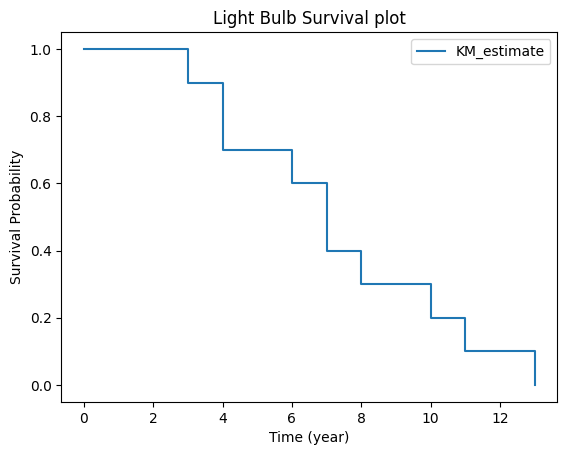

In [19]:
# Create KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Fit the model
kmf.fit(durations=df['T'], event_observed=df['E'])

# Plot the curve 
kmf.plot(ci_show=False)
plt.title('Light Bulb Survival plot')
plt.xlabel('Time (year)')
plt.ylabel('Survival Probability')

Interpretation: The probability that a light bulb survives longer than 8 year is 30%

Given 10 samples and no censoring, at every event occurence the curve drops 1/10. The underlying survival_function_ method confirms this.   


In [11]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.0
3.0,0.9
4.0,0.7
6.0,0.6
7.0,0.4
8.0,0.3
10.0,0.2
11.0,0.1
13.0,0.0


## Example 2: KM curve with censoring 

Let's consider the same example with 10 light bulbs, where some of them are not yet burned out or we have lost track of thier status(right-censoring)

In [31]:
data = {
    'T': [3, 4, 4, 6, 7, 7, 8, 10, 11, 13],
    'E': [1, 1, 0, 1, 1, 0, 1, 1, 1, 0],
}

df = pd.DataFrame(data)

Text(0, 0.5, 'Survival Probability')

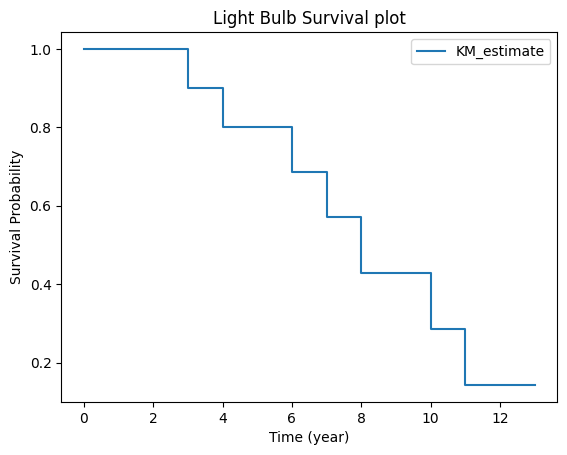

In [32]:
kmf = KaplanMeierFitter()
kmf.fit(durations=df['T'], event_observed=df['E'])

kmf.plot(ci_show=False)
plt.title('Light Bulb Survival plot')
plt.xlabel('Time (year)')
plt.ylabel('Survival Probability')

In [33]:
kmf.survival_function_.reset_index()

,timeline,KM_estimate
0,0.0,1.000000
1,3.0,0.900000
2,4.0,0.800000
3,6.0,0.685714
4,7.0,0.571429
5,8.0,0.428571
6,10.0,0.285714
7,11.0,0.142857
8,13.0,0.142857


Let's see how the KM survival function S(t) is constructed from the KM curve table
t | d| c|n |S_i(t)| S(t) 
--|--|--|--|--|--|
0 | 0| 0|10|10/10 =1 | 1
3 | 1| 0|10|1-1/10 =9/10| 0.9
4 | 1| 1| 9|1-1/9 = 8/9 | 0.8
6 | 1| 0| 7|1-1/7 = 6/7 | 0.6857
7 | 1| 1| 6|1-1/6 = 5/6 | 0.5714
8 | 1| 0| 4|1-1/4 = 3/4 | 0.4285
10| 1| 0| 3|1-1/3 = 2/3 | 0.2857
11| 1| 0| 2|1-1/2 = 1/2 | 0.1428
13| 0| 1| 1|1-0/1 = 1   | 0.1428

## Example 3: Comparing Survival Curves:


### Data: Criminals return to prison
The [study data](https://gwern.net/doc/sociology/1980-rossi-moneyworkandcrime.pdf) involved 432 Maryland convicts released in the 1970s, tracked for one year post-release. The experiment was designed to test the impact of financial assistance on post-release outcomes, with subjects randomly divided into two equal groups

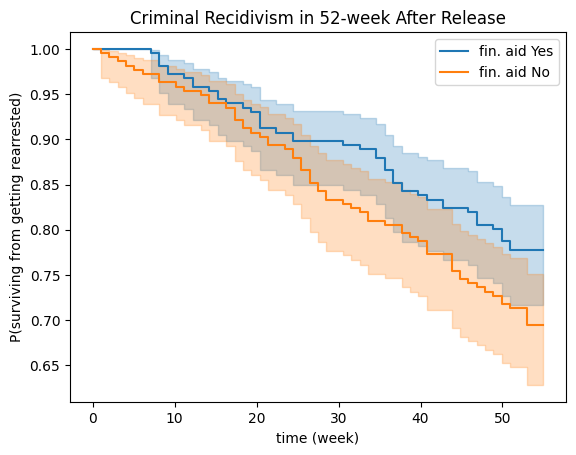

In [ ]:
from lifelines.datasets import load_rossi
import numpy as np

# loading data 
data = load_rossi()
treat = data.query("fin == 1") 
ctrl = data.query("fin == 0")

# init & Fitting KM curves 
ax = plt.subplot(111)
t = np.linspace(0, 55, 55)
kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()
kmf1.fit(treat['week'], treat['arrest'], timeline=t, label="fin. aid Yes")
kmf2.fit(ctrl['week'], ctrl['arrest'], timeline=t, label="fin. aid No")

# plotting the KM curves
kmf1.plot(ax=ax), kmf2.plot(ax=ax)
ax.set_title("Criminal Recidivism in 52-week After Release");
ax.set_ylabel("P(surviving from getting rearrested)");
# ax.set_ylabel("Prob. of getting rearrested");
ax.set_xlabel("time (week)");

### Statistical Significance 

Are these two curves statistically equivalent? To answer this question, we can use the log-rank test (Mantel 1966; Peto and Peto 1972). This is the most well-known and widely used method to test the null hypothesis of no difference in survival between two or more independent groups.

In [26]:

from lifelines.statistics import logrank_test
log_rank_test_result = logrank_test(
    treat['week'], 
    ctrl['week'], 
    event_observed_A=treat['arrest'], 
    event_observed_B=ctrl['arrest'],
)
print(f'p-value: {log_rank_test_result.p_value:.4f}')


p-value: 0.0501


:::{admonition} Remarks: 

* While `logrank_test` function is used for two KM curves, `multivariate_logrank_test` can be used for more than 2 KM curves. 
* These methods provide weightings for hypothesis testing early vs late difference
:::

## Example 4: Identifying Data Drift

In [79]:
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_clients = 1500  # 500 clients per start year

# Define start years and generate dates
start_years = [2020, 2021, 2022]
clients_per_year = n_clients // len(start_years)

start_dates = []
for year in start_years:
    # Generate random dates within each year
    dates = [datetime(year, 1, 1) + timedelta(days=np.random.randint(0, 365)) 
            for _ in range(clients_per_year)]
    start_dates.extend(dates)

# Convert to numpy array
start_dates = np.array(start_dates)

# Generate time to churn (in days)
# More recent clients tend to churn faster
base_churn_time = np.random.exponential(scale=70, size=int(n_clients * 0.3) )
years_active = (datetime(2025, 3, 16) - start_dates).astype('timedelta64[D]').astype(int)
time_to_churn = base_churn_time * (1 + years_active * 0.001)

# Generate censoring indicator (1 = churned, 0 = still active)
# Older clients are more likely to be censored (survived longer)
censoring_prob = 0.4 - (years_active * 0.0002)
censored = np.random.binomial(n=1, p=censoring_prob, size=n_clients)

# Create DataFrame
df = pd.DataFrame({
    'start_date': start_dates,
    'start_year': [d.year for d in start_dates],
    'time_to_churn': time_to_churn,
    'churned': censored,
    'years_active': years_active / 365
})

ValueError: operands could not be broadcast together with shapes (450,) (1500,) 

array([[<Axes: title={'center': '0'}>]], dtype=object)

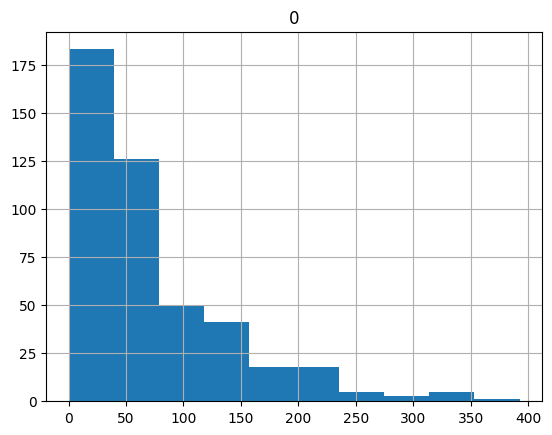

In [80]:
pd.DataFrame(base_churn_time).hist()

In [69]:
df.query("churned == 0")

,start_date,start_year,time_to_churn,churned,years_active
0,2020-04-12,2020,67.798735,0,4.928767
1,2020-12-14,2020,344.267016,0,4.254795
2,2020-09-27,2020,9.550877,0,4.468493
3,2020-04-16,2020,1.331916,0,4.917808
4,2020-03-12,2020,7.658317,0,5.013699
...,...,...,...,...,...
1495,2022-02-03,2022,35.150306,0,3.115068
1496,2022-09-08,2022,111.633717,0,2.520548
1497,2022-09-04,2022,2.386099,0,2.531507
1498,2022-09-26,2022,34.757266,0,2.471233


In [67]:
df.groupby(['start_year'])['churned'].value_counts()

start_year  churned
2020        0          471
            1           29
2021        0          441
            1           59
2022        0          404
            1           96
Name: count, dtype: int64

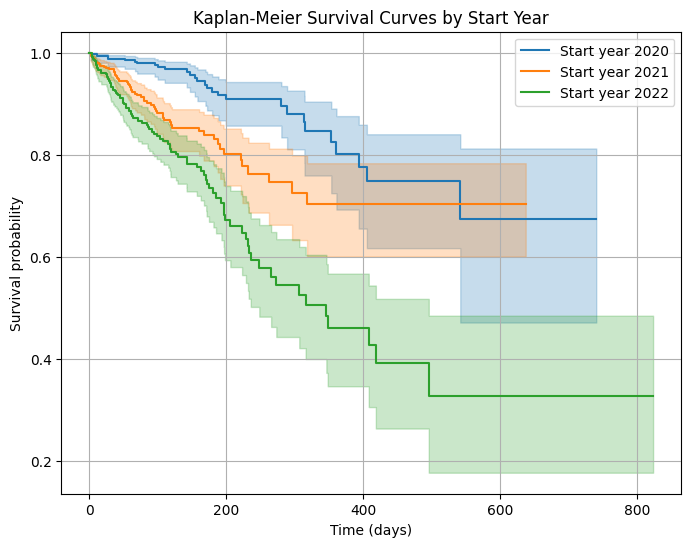

In [68]:
# Plot Kaplan-Meier curves for different start years

kmf = KaplanMeierFitter()
plt.figure(figsize=(8, 6))

for year in start_years:
    mask = df['start_year'] == year
    kmf.fit(
        durations=df.loc[mask, 'time_to_churn'],
        event_observed=df.loc[mask, 'churned'],
        label=f'Start year {year}'
    )
    kmf.plot()

plt.title('Kaplan-Meier Survival Curves by Start Year')
plt.xlabel('Time (days)')
plt.ylabel('Survival probability')
plt.grid(True)
plt.show()

## Example 4: Feature Selection

- horTh: hormonal therapy, a factor at two levels no and yes.

- age: of the patients in years.
- menostat: 0 menopausal status, a factor at two levels pre (premenopausal) and post (postmenopausal).
- tsize: tumor size (in mm).
- tgrade: tumor grade, a ordered factor at levels I < II < III.
- pnodes: number of positive nodes.
- progrec: progesterone receptor (in fmol).
- estrec: estrogen receptor (in fmol).

time: recurrence free survival time (in days).

cens: censoring indicator (0- censored, 1- event).

Dataset from:

V.J. Menon and D.C. Agrawal,  Renewal Rate of Filament Lamps: 
Theory and Experiment. Journal of Failure Analysis and Prevention. 
December 2007, p. 421, Table 2/
DOI: 10.1007/s11668-007-9074-9

Description:

An assembly of 50 new Philips (India) lamps with the 
rating 40 W, 220 V (AC) was taken and installed in the horizontal 
orientation and uniformly distributed over a lab area 11 m by 7 m. 

The assembly was monitored at regular intervals of 12 h to
look for failures. The instants of recorded failures were
called t‘ and a total of 32 data points were obtained such
that even the last bulb failed. 

Variables:

i - observation number
h - time in hours since experiment start
f - number of failed lamps at particular time h
K - number of surviving lamps  at particular time h

In [94]:
from lifelines.datasets import load_kidney_transplant, load_gbsg2
# df = load_kidney_transplant()
df = load_gbsg2()

In [97]:
df['tgrade'].value_counts()

tgrade
II     444
III    161
I       81
Name: count, dtype: int64

<Axes: xlabel='timeline'>

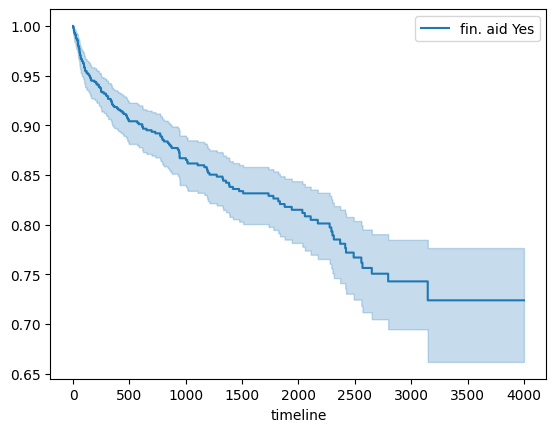

In [93]:
from lifelines.datasets import load_rossi
import numpy as np

# loading data 
data = load_rossi()
treat = data.query("fin == 1") 
ctrl = data.query("fin == 0")

# init & Fitting KM curves 
ax = plt.subplot(111)
t = np.linspace(0, 4000, 4000)
kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()
kmf1.fit(df['time'], df['death'], timeline=t, label="fin. aid Yes")


# # plotting the KM curves
kmf1.plot(ax=ax)
# ax.set_title("Criminal Recidivism in 52-week After Release");
# ax.set_ylabel("P(surviving from getting rearrested)");
# # ax.set_ylabel("Prob. of getting rearrested");
# ax.set_xlabel("time (week)");

## Example 5: Detecting Data Bias 

## Example 6: Hazard Function

# 

# Best practices for visualising Kaplan-Meier plots

In a recent survey from variaty of stakeholders in healthcares, suggested that the addition of summary tables and confidence intervals  greatly increased the effectiveness of Kaplan Meier plots
[article](https://pubmed.ncbi.nlm.nih.gov/31575572/)

# Challenging Scenarios
* Accounting for time-varying covariates
    * Low-frequency time-varying variables for example age, sex:
    * High-frequqncy time-varying variables for example stock price fluctuation 

* Controling for covariates: 
    * We already know that KM visualize the outcome. However, in causal inference scenarios we are interested in visualising the outcome between treatment and control groups where the distribution of the featues set are overlapping.   

# Summary & Take Aways

* If there are no censored observations and all subjects die KM-curve reaces zero, otherwise to the fraction of subjects that survived. 
* If the data for any subjects are censored, the bottom point on the survival curve will not equal the fraction of subjects that survived. [link for further reading](https://www.graphpad.com/support/faq/what-determines-how-low-a-kaplan-meier-survival-curve-ends-up-at-late-time-points/#:~:text=If%20there%20are%20no%20censored,the%20percent%20survival%20is%20zero.)

* If the survival curve goes all the way down tozero, that does not mean that every subject in the study died and some could be probably censored. 

# Advanced Topics

- How to handle time-series data?

## Example 6: Correcting for covariates
